In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1=pd.read_csv('Cars93.csv')

In [4]:
df1

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPGCITY,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [ ]:
# Understanding Data

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               93 non-null     int64  
 1   Manufacturer     93 non-null     object 
 2   Model            93 non-null     object 
 3   Type             93 non-null     object 
 4   Min.Price        93 non-null     float64
 5   Price            93 non-null     float64
 6   Max.Price        93 non-null     float64
 7   MPGCITY          93 non-null     int64  
 8   MPG.highway      93 non-null     int64  
 9   AirBags          89 non-null     object 
 10  DriveTrain       93 non-null     object 
 11  Cylinders        93 non-null     object 
 12  EngineSize       93 non-null     float64
 13  Horsepower       93 non-null     int64  
 14  RPM              93 non-null     int64  
 15  Rev.per.mile     93 non-null     int64  
 16  Man.trans.avail  93 non-null     object 
 17  fuel             9

In [ ]:
# missing values treatment with visuals

In [6]:
df1.isna().sum().sort_values(ascending=False)

Luggage.room       11
AirBags             4
Rear.seat.room      2
id                  0
Rev.per.mile        0
Origin              0
Weight              0
Turn.circle         0
Width               0
Wheelbase           0
Length              0
Passengers          0
fuel                0
Man.trans.avail     0
RPM                 0
Manufacturer        0
Horsepower          0
EngineSize          0
Cylinders           0
DriveTrain          0
MPG.highway         0
MPGCITY             0
Max.Price           0
Price               0
Min.Price           0
Type                0
Model               0
Make                0
dtype: int64

<Axes: >

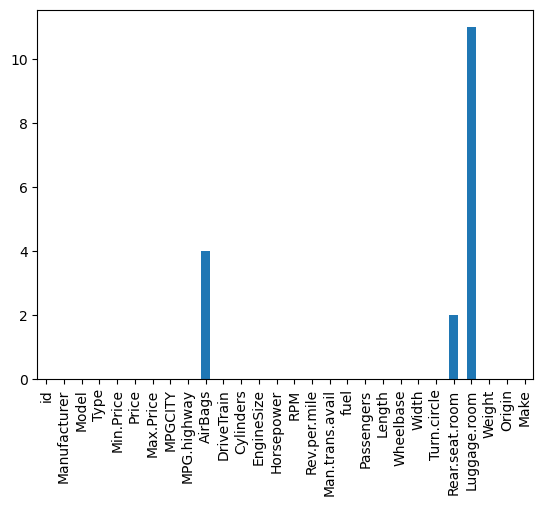

In [7]:
df1.isna().sum().plot(kind='bar')

In [9]:
# filling null values
for i in df1.columns:
    if df1[i].dtypes==object:
        df1[i]=df1[i].fillna(df1[i].mode()[0])
    else:
        df1[i]=df1[i].fillna(df1[i].mean())

In [10]:
df1.isna().sum().sort_values(ascending=False)

id                 0
Manufacturer       0
Origin             0
Weight             0
Luggage.room       0
Rear.seat.room     0
Turn.circle        0
Width              0
Wheelbase          0
Length             0
Passengers         0
fuel               0
Man.trans.avail    0
Rev.per.mile       0
RPM                0
Horsepower         0
EngineSize         0
Cylinders          0
DriveTrain         0
AirBags            0
MPG.highway        0
MPGCITY            0
Max.Price          0
Price              0
Min.Price          0
Type               0
Model              0
Make               0
dtype: int64

In [ ]:
# Descriptive Statistics

In [11]:
for i in df1.columns:
    if df1[i].dtypes!=object:
        print(i)
        print()
        print(df1[i].describe())
        print('******************************************************')

id

count    93.000000
mean     47.000000
std      26.990739
min       1.000000
25%      24.000000
50%      47.000000
75%      70.000000
max      93.000000
Name: id, dtype: float64
******************************************************
Min.Price

count    93.000000
mean     17.125806
std       8.746029
min       6.700000
25%      10.800000
50%      14.700000
75%      20.300000
max      45.400000
Name: Min.Price, dtype: float64
******************************************************
Price

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64
******************************************************
Max.Price

count    93.000000
mean     21.898925
std      11.030457
min       7.900000
25%      14.700000
50%      19.600000
75%      25.300000
max      80.000000
Name: Max.Price, dtype: float64
******************************************************
MPGCITY

count    93.0

In [ ]:
# heatmap

In [12]:
df1.corr()

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_4972\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,id,Min.Price,Price,Max.Price,MPGCITY,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,fuel,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
id,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126129,-0.161114,-0.220525
Min.Price,-0.144463,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,-0.137277,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
Max.Price,-0.126567,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPGCITY,0.161808,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPG.highway,0.137317,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,-0.338286,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,-0.233012,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,0.167772,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931
Rev.per.mile,0.226389,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.370410,-0.557095,-0.735264


C:\Users\Ganesh\AppData\Local\Temp\ipykernel_4972\4100836781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df1.corr())


<Axes: >

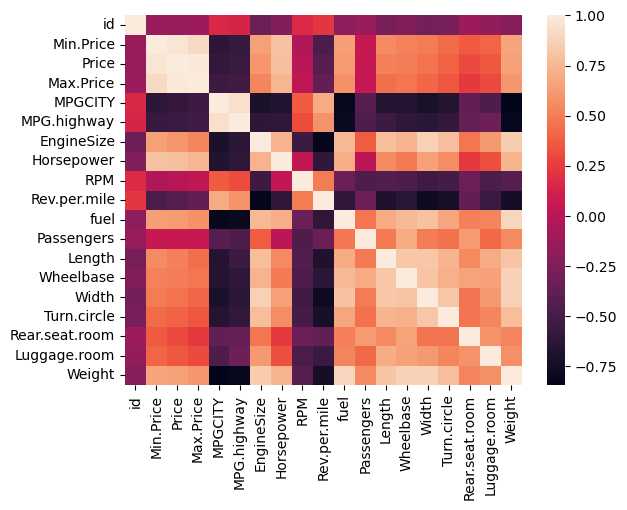

In [14]:
sb.heatmap(df1.corr())

In [ ]:
# Geographical Analysis

In [16]:
df1['Origin'].value_counts()

USA        48
non-USA    45
Name: Origin, dtype: int64

<Axes: >

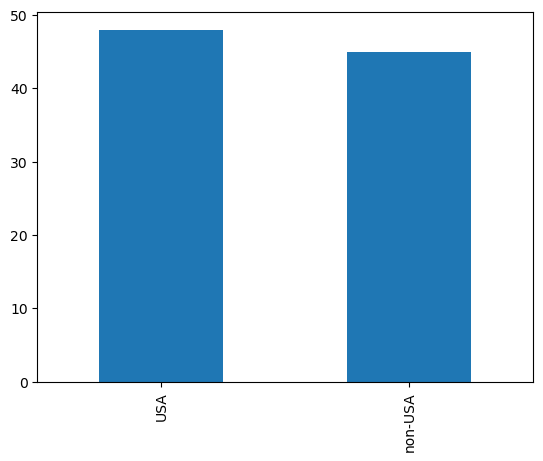

In [18]:
df1['Origin'].value_counts().plot(kind='bar') 

In [ ]:
# pairplot

In [22]:
df2=df1[['Price','Horsepower','EngineSize','Weight','Length','id']]

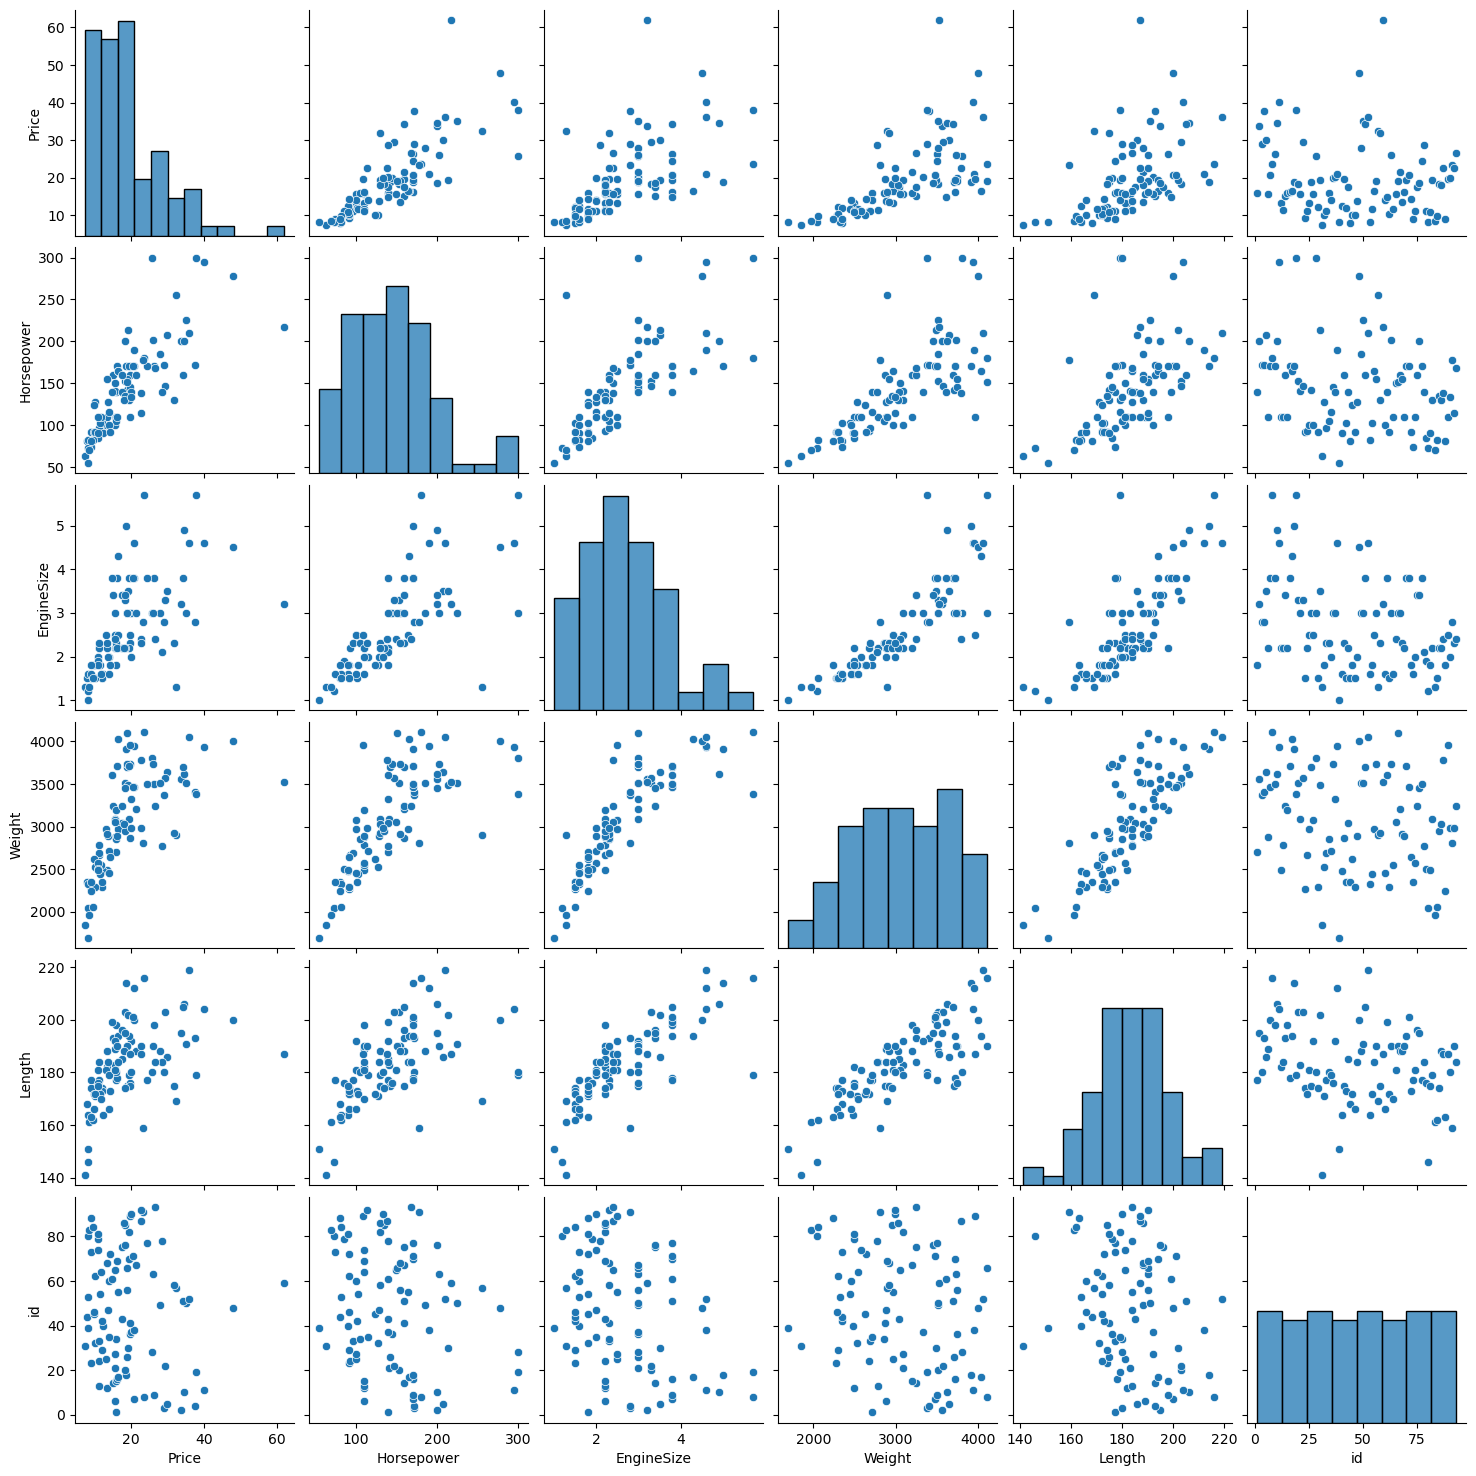

In [23]:
sb.pairplot(data=df2)

In [ ]:
# show the avg of price of each origin.

In [25]:
df1.groupby(by='Origin')['Price'].mean()

Origin
USA        18.572917
non-USA    20.508889
Name: Price, dtype: float64

<Axes: xlabel='Origin'>

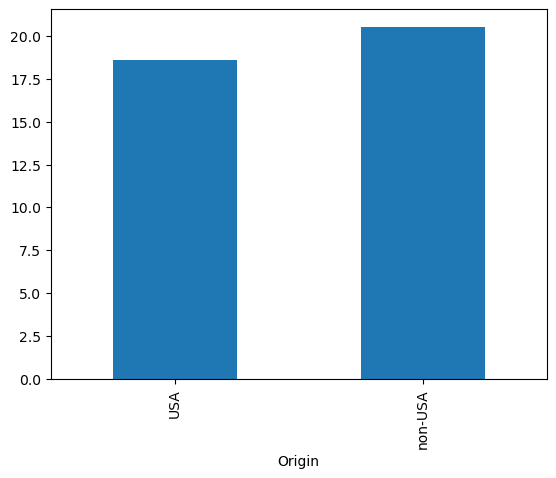

In [26]:
df1.groupby(by='Origin')['Price'].mean().plot(kind='bar')

In [27]:
# show the maximuim price for each car type .

In [28]:
df1.groupby(by='Type')['Price'].max()

Type
Compact    31.9
Large      36.1
Midsize    61.9
Small      15.9
Sporty     38.0
Van        22.7
Name: Price, dtype: float64

<Axes: ylabel='Type'>

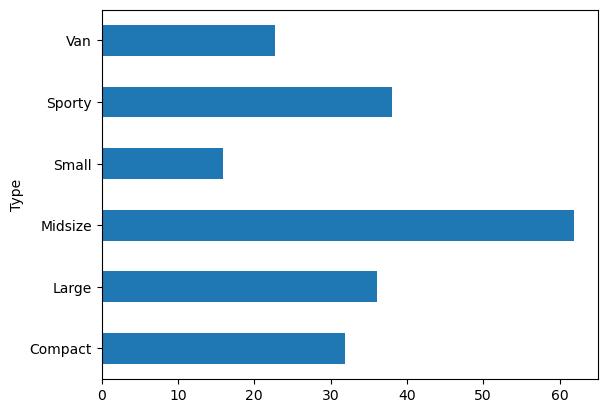

In [29]:
df1.groupby(by='Type')['Price'].max().plot(kind='barh')

In [ ]:
# show the top 2 car types having highest average price.

In [30]:
df1.groupby(by='Type')['Price'].mean().sort_values(ascending=False).head(2)

Type
Midsize    27.218182
Large      24.300000
Name: Price, dtype: float64

<Axes: xlabel='Type'>

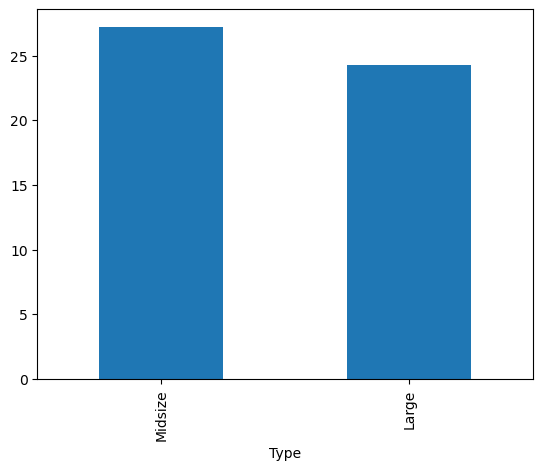

In [31]:
df1.groupby(by='Type')['Price'].mean().sort_values(ascending=False).head(2).plot(kind='bar')

In [ ]:
# Generate a pie chart to visualize theproportion of cars with "Rear" and "Front" wheel drive.

In [32]:
df11=df1[(df1['DriveTrain']=='Rear') | (df1['DriveTrain']=='Front') ]

<Axes: ylabel='DriveTrain'>

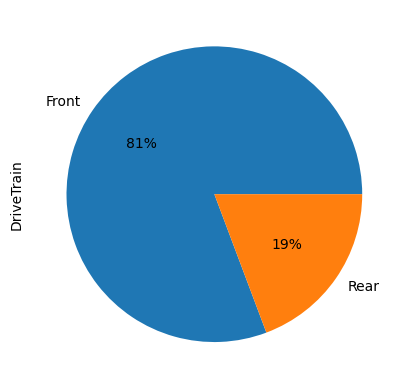

In [34]:
df11.DriveTrain.value_counts().plot(kind='pie',autopct='%1.0f%%')

In [ ]:
# Create a box plot for the "Fuel.tank.capacity"column.

<Axes: >

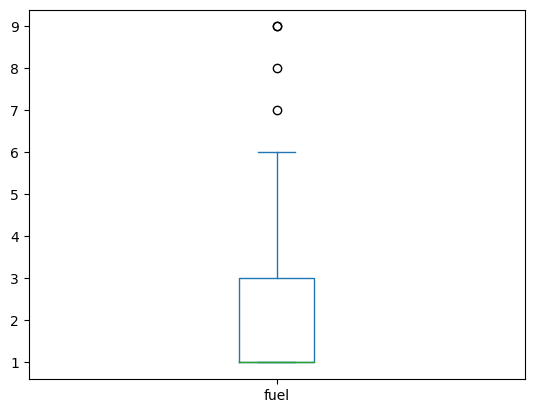

In [35]:
df1.fuel.value_counts().plot(kind='box')

In [ ]:
# What is the correlation coefficient between"Horsepower" and "Price" columns?

In [36]:
df1[['Horsepower','Price']].corr()

,Horsepower,Price
Horsepower,1.000000,0.788218
Price,0.788218,1.000000


In [ ]:
# Create a scatter plot between "EngineSize" and "MPG.city" columns.

<Axes: xlabel='EngineSize', ylabel='MPGCITY'>

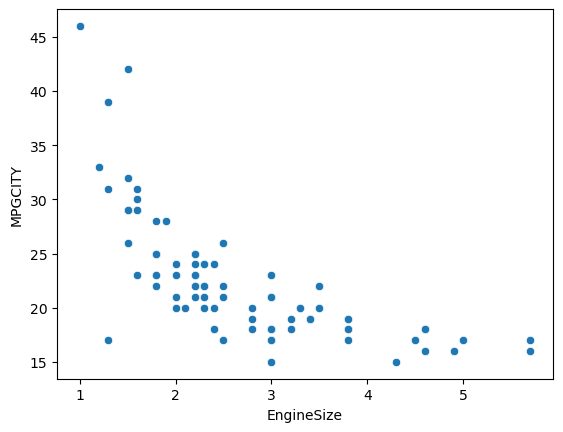

In [37]:
sb.scatterplot(data=df1,x='EngineSize',y='MPGCITY')

In [38]:
# Plot a bar chart to compare the average"RPM" for each "Cylinders" category

<Axes: xlabel='Cylinders'>

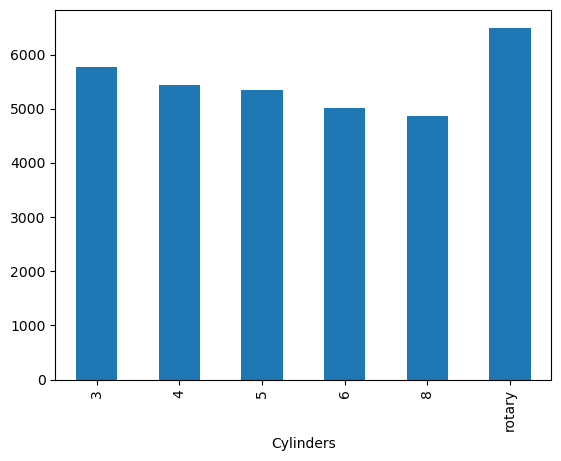

In [39]:
df1.groupby('Cylinders')['RPM'].mean().plot(kind='bar')

In [ ]:
# Create a box plot to visualize the distribution of "Weight" for each "Origin" (USA, non-USA).

<Axes: xlabel='Origin', ylabel='Weight'>

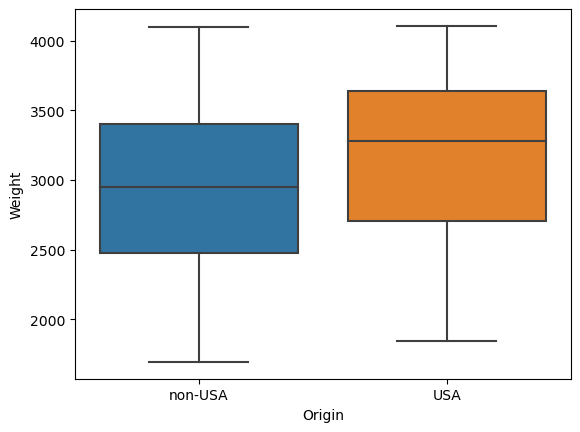

In [40]:
sb.boxplot(data=df1,x="Origin",y="Weight")

In [ ]:
# Create a scatter plot with "RPM" on the x-axis and "Horsepower" on the y-axis, with different colors for each "Type.

<Axes: xlabel='RPM', ylabel='Horsepower'>

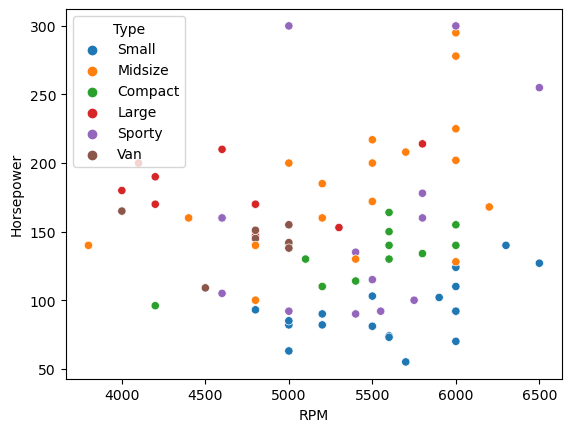

In [42]:
sb.scatterplot(data=df1,x="RPM",y="Horsepower",hue='Type')

In [ ]:
# Visualize the distribution of "Price" for each "DriveTrain" category using a box plot

<Axes: xlabel='DriveTrain', ylabel='Price'>

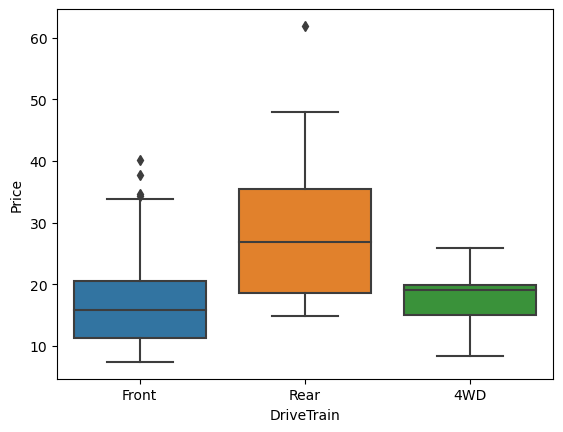

In [43]:
sb.boxplot(data=df1,x="DriveTrain",y="Price")

In [ ]:
# Plot a bar chart to compare the average "Rear.seat.room" for each car "Type.

<Axes: xlabel='Type'>

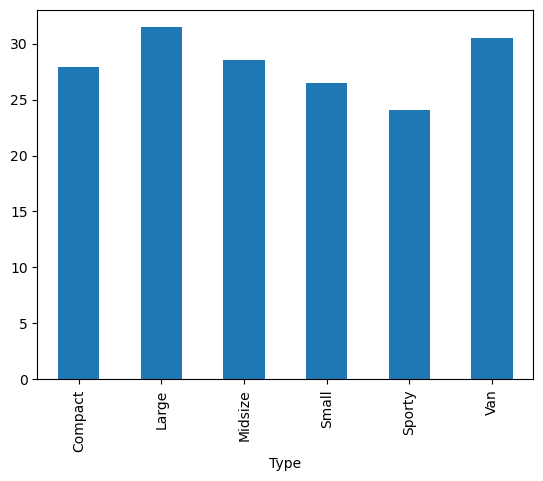

In [44]:
df1.groupby('Type')['Rear.seat.room'].mean().plot(kind='bar')

In [ ]:
# Generate a scatter plot matrix for "Length,""Width," "Height," and "Weight.

In [45]:
df01=df1[['Weight','Width','Length']]

In [46]:
df01

,Weight,Width,Length
0,2705,68,177
1,3560,71,195
2,3375,67,180
3,3405,70,193
4,3640,69,186
...,...,...,...
88,3960,72,187
89,2985,67,180
90,2810,66,159
91,2985,67,190


<Axes: >

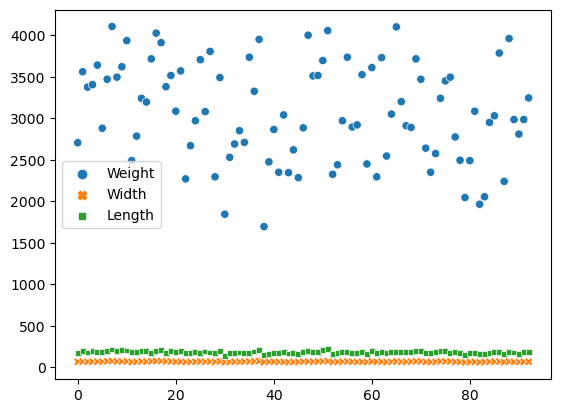

In [47]:
sb.scatterplot(df01)

In [ ]:
# Filter cars that have a 'Manufacturer' name starting with the letter 'C'.

In [48]:
df1[df1['Manufacturer'].str[0]=='C']

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPGCITY,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.00000,18.000000,3620,USA,Cadillac DeVille
10,11,Cadillac,Seville,Midsize,37.5,40.1,42.7,16,25,Driver & Passenger,...,5,204,111,74,44,31.00000,14.000000,3935,USA,Cadillac Seville
11,12,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.00000,13.000000,2490,USA,Chevrolet Cavalier
12,13,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,...,5,184,103,68,39,26.00000,14.000000,2785,USA,Chevrolet Corsica
13,14,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,...,4,193,101,74,43,25.00000,13.000000,3240,USA,Chevrolet Camaro
14,15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,...,6,198,108,71,40,28.50000,16.000000,3195,USA,Chevrolet Lumina
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.50000,13.890244,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,...,8,194,111,78,42,33.50000,13.890244,4025,USA,Chevrolet Astro
17,18,Chevrolet,Caprice,Large,18.0,18.8,19.6,17,26,Driver only,...,6,214,116,77,42,29.50000,20.000000,3910,USA,Chevrolet Caprice
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,27.82967,13.890244,3380,USA,Chevrolet Corvette


In [ ]:
# How can you extract cars with 'AirBags' labeled as 'None'?

In [50]:
df1[df1['AirBags']=='None']

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPGCITY,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.000000,2705,non-USA,Acura Integra
11,12,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.000000,2490,USA,Chevrolet Cavalier
14,15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,...,6,198,108,71,40,28.5,16.000000,3195,USA,Chevrolet Lumina
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,13.890244,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,...,8,194,111,78,42,33.5,13.890244,4025,USA,Chevrolet Astro
22,23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,...,5,174,98,66,32,26.5,11.000000,2270,USA,Dodge Colt
28,29,Eagle,Summit,Small,7.9,12.2,16.5,29,33,None,...,5,174,98,66,36,26.5,11.000000,2295,USA,Eagle Summit
30,31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,...,4,141,90,63,33,26.0,12.000000,1845,USA,Ford Festiva
31,32,Ford,Escort,Small,8.4,10.1,11.9,23,30,None,...,5,171,98,67,36,28.0,12.000000,2530,USA,Ford Escort
32,33,Ford,Tempo,Compact,10.4,11.3,12.2,22,27,None,...,5,177,100,68,39,27.5,13.000000,2690,USA,Ford Tempo


In [ ]:
# Filter cars that have 'MPG.city' and 'MPG.highway' values greater than 20.

In [51]:
df1[(df1['MPGCITY']>20) & (df1['MPG.highway']>20)]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPGCITY,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
11,12,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
12,13,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
14,15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
20,21,Chrysler,LeBaron,Compact,14.5,15.8,17.1,23,28,Driver & Passenger,...,6,183,104,68,41,30.5,14.0,3085,USA,Chrysler LeBaron
22,23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,...,5,174,98,66,32,26.5,11.0,2270,USA,Dodge Colt
23,24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,...,5,172,97,67,38,26.5,13.0,2670,USA,Dodge Shadow
24,25,Dodge,Spirit,Compact,11.9,13.3,14.7,22,27,Driver only,...,6,181,104,68,39,30.5,14.0,2970,USA,Dodge Spirit


In [ ]:
# What is the maximum horsepower for each car manufacturer

In [52]:
df1.groupby('Manufacturer')['Horsepower'].max()

Manufacturer
Acura            200
Audi             172
BMW              208
Buick            180
Cadillac         295
Chevrolet        300
Chrylser         153
Chrysler         147
Dodge            300
Eagle            214
Ford             190
Geo               90
Honda            160
Hyundai          128
Infiniti         278
Lexus            225
Lincoln          210
Mazda            255
Mercedes-Benz    217
Mercury          140
Mitsubishi       202
Nissan           160
Oldsmobile       170
Plymouth          92
Pontiac          200
Saab             140
Saturn            85
Subaru           130
Suzuki            70
Toyota           138
Volkswagen       178
Volvo            168
Name: Horsepower, dtype: int64

<Axes: ylabel='Manufacturer'>

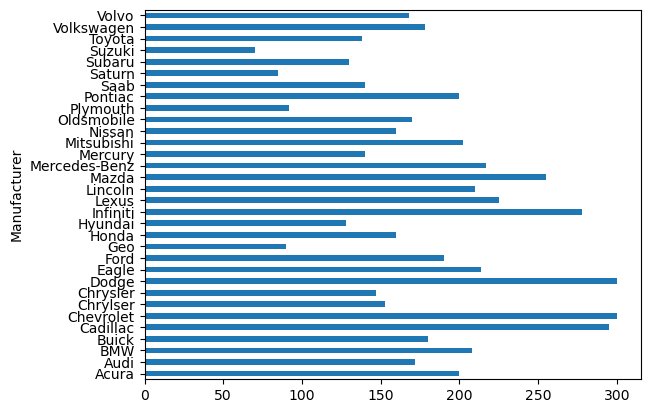

In [53]:
df1.groupby('Manufacturer')['Horsepower'].max().plot(kind='barh')

In [ ]:
# For each car manufacturer, calculate the average MPG.city and MPG.highway.

In [54]:
df1.groupby('Manufacturer')['MPGCITY','MPG.highway'].mean()

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_4972\2227371313.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('Manufacturer')['MPGCITY','MPG.highway'].mean()


,MPGCITY,MPG.highway
Manufacturer,,
Acura,21.500000,28.000000
Audi,19.500000,26.000000
BMW,22.000000,30.000000
Buick,19.000000,27.750000
Cadillac,16.000000,25.000000
Chevrolet,19.625000,27.625000
Chrylser,20.000000,28.000000
Chrysler,21.500000,27.000000
Dodge,21.666667,26.833333


C:\Users\Ganesh\AppData\Local\Temp\ipykernel_4972\551778920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('Manufacturer')['MPGCITY','MPG.highway'].mean().plot(kind='bar')


<Axes: xlabel='Manufacturer'>

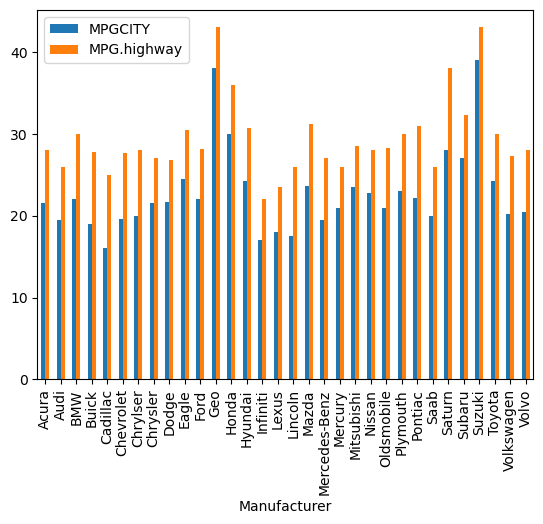

In [57]:
df1.groupby('Manufacturer')['MPGCITY','MPG.highway'].mean().plot(kind='bar')

In [ ]:
# Find the standard deviation of MPG.city for each car manufacturer.

In [59]:
df1.groupby('Manufacturer')['MPGCITY'].std()

Manufacturer
Acura             4.949747
Audi              0.707107
BMW                    NaN
Buick             2.449490
Cadillac          0.000000
Chevrolet         3.739270
Chrylser               NaN
Chrysler          2.121320
Dodge             4.273952
Eagle             6.363961
Ford              4.659859
Geo              11.313708
Honda            10.392305
Hyundai           4.031129
Infiniti               NaN
Lexus             0.000000
Lincoln           0.707107
Mazda             5.683309
Mercedes-Benz     0.707107
Mercury           2.828427
Mitsubishi        7.778175
Nissan            5.057997
Oldsmobile        2.943920
Plymouth               NaN
Pontiac           5.215362
Saab                   NaN
Saturn                 NaN
Subaru            5.291503
Suzuki                 NaN
Toyota            5.909033
Volkswagen        3.593976
Volvo             0.707107
Name: MPGCITY, dtype: float64

<Axes: xlabel='Manufacturer'>

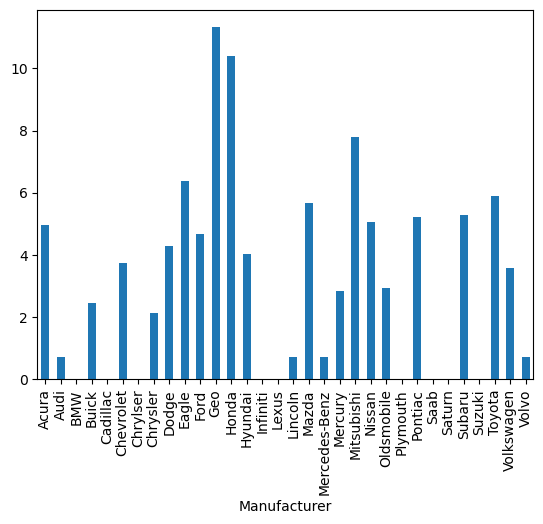

In [60]:
df1.groupby('Manufacturer')['MPGCITY'].std().plot(kind='bar')

In [ ]:
# Calculate the maximum weight for each cartype for cars with 6 cylinders.

In [61]:
dc1=df1[df1["Cylinders"]=='6']

In [62]:
dc1.groupby('Type')['Weight'].max()

Type
Compact    3375
Large      4105
Midsize    3730
Sporty     3805
Van        4100
Name: Weight, dtype: int64

<Axes: ylabel='Type'>

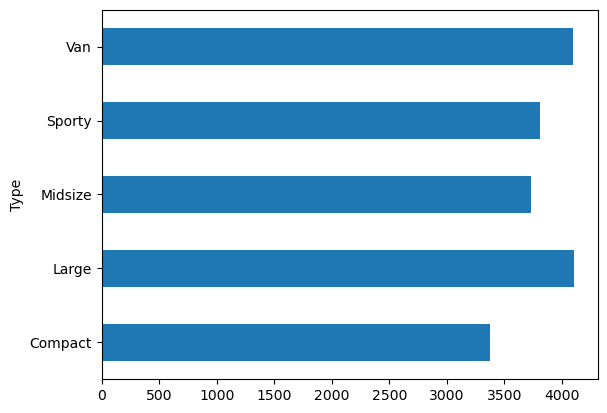

In [63]:
dc1.groupby('Type')['Weight'].max().plot(kind='barh')